In [5]:
#NORMALIZING AUDIO
import numpy as np
import librosa
import soundfile as sf

def normalize_audio(audio):
    max_amplitude = np.max(np.abs(audio))
    normalized_audio = audio / max_amplitude if max_amplitude != 0 else audio
    return normalized_audio

# Load sample audio file
file_path = 'new_audio.wav'
y, sr = librosa.load(file_path, sr=None)

# Normalize audio
normalized_audio = normalize_audio(y)

# Save the normalized audio to a new file
output_path = 'audio1.wav'
sf.write(output_path, normalized_audio, sr)


In [6]:
#Normalized without built-in
import numpy as np
import scipy.io.wavfile as wav

def normalize_audio(audio_data):
    # Calculate the maximum absolute amplitude
    max_amp = np.max(np.abs(audio_data))
    
    # Scale the audio data to have maximum absolute amplitude of 1
    normalized_audio = audio_data / max_amp
    
    return normalized_audio

def main():
    # Load audio file
    fs, audio_data = wav.read('sample.wav')
    
    # Normalize the audio data
    normalized_audio = normalize_audio(audio_data)
    
    # Save normalized audio to file
    wav.write('sample1.wav', fs, normalized_audio.astype(np.float32))

if __name__ == "__main__":
    main()


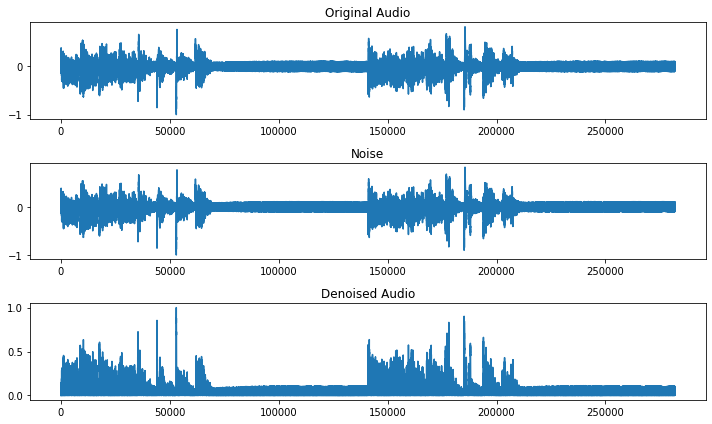

In [6]:
#noise remove
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
def spectral_subtraction(audio, noise, alpha=2):
    # Perform spectral subtraction
    result = np.maximum(0, np.subtract(audio, alpha * noise))
    return result

# Load audio file and noise file
audio, sr_audio = sf.read('audio1.wav')
noise, sr_noise = sf.read('audio1.wav')

# Ensure both audio and noise have the same sample rate
if sr_audio != sr_noise:
    raise ValueError("Sample rates of audio and noise do not match.")

# Ensure noise has the same length as or shorter than audio
if len(noise) > len(audio):
    noise = noise[:len(audio)]
else:
    # If noise is shorter than audio, pad noise with zeros
    noise = np.pad(noise, (0, len(audio) - len(noise)), 'constant')

# Perform spectral subtraction
denoised_audio = spectral_subtraction(audio, noise)
plt.figure(figsize=(10, 6))

# Original audio
plt.subplot(3, 1, 1)
plt.plot(audio)
plt.title('Original Audio')

# Noise
plt.subplot(3, 1, 2)
plt.plot(noise)
plt.title('Noise')

# Denoised audio
plt.subplot(3, 1, 3)
plt.plot(denoised_audio)
plt.title('Denoised Audio')

plt.tight_layout()
plt.show()

# Save the denoised audio to a new file
output_path = 'audio2.wav'
sf.write(output_path, denoised_audio, sr_audio)


In [7]:
#Trimming Audio file
from pydub import AudioSegment

def trim_audio(input_file, output_file, start_ms, end_ms):
    # Load the audio file
    audio = AudioSegment.from_file(input_file)
    
    # Trim the audio
    trimmed_audio = audio[start_ms:end_ms]
    
    # Export the trimmed audio to a new file
    trimmed_audio.export(output_file, format="wav")

def main():
    # Input audio file path
    input_file = 'audio2.wav'
    
    # Output audio file path
    output_file = 'audio3.wav'
    
    # Start and end times in milliseconds (adjust as needed)
    start_ms = 10000  # Start time (10 seconds)
    end_ms = 40000    # End time (30 seconds)
    
    # Trim the audio
    trim_audio(input_file, output_file, start_ms, end_ms)
    
    print("Trimming completed!")

if __name__ == "__main__":
    main()


Trimming completed!


C:\Users\User\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [8]:
#segmentation

from pydub import AudioSegment
import os

def segment_audio(input_path, output_dir, segment_length_ms):
    audio = AudioSegment.from_file(input_path)
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)
    # Segment audio into fixed-length segments
    for i, start_time in enumerate(range(0, len(audio), segment_length_ms)):
        segment = audio[start_time:start_time+segment_length_ms]
        segment.export(os.path.join(output_dir, f"segment_{i}.wav"), format="wav")
# Example usage:
input_path =  'audio3.wav'
output_dir =  'audio4.wav'
segment_length_ms = 5000  # 5 seconds

segment_audio(input_path, output_dir, segment_length_ms)


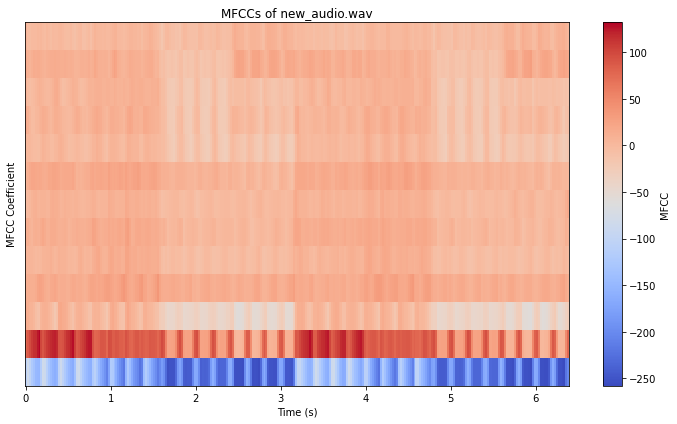

In [11]:
#MFCC

import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_mfcc(audio_file, n_mfcc=13):
    """
    Plot the MFCCs of an audio file.

    Parameters:
        audio_file (str): Path to the audio file.
        n_mfcc (int): Number of MFCC coefficients to compute.
    """
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Plot MFCCs
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar(label='MFCC')
    plt.title('MFCCs of {}'.format(audio_file))
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficient')
    plt.tight_layout()
    plt.show()

# Example usage:
audio_file = 'new_audio.wav'
plot_mfcc(audio_file)
